In [212]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 # Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')


In [213]:
#Loading the data from excel
loan_data = pd.read_csv('D:\Case_Study\loan.csv',index_col = 0)
# check shape & datatype of loan data
print(loan_data.shape)
# Print the informtion of loan dataset
print(loan_data.info())
#Print the datatype of each column
print(loan_data.dtypes)
#Print the first 5 records from dataset
print(loan_data.head())



(39717, 110)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB
None
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 110, dtype: object
         member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000           4975.0   36 months   
1077430    1314167       2500         2500           2500.0   60 months   
1077175    1313524       24

In [214]:
#Dealing with loan data from excel
## Find the number of rows and columns
print('Number of Rows in input data:',loan_data.shape[0])
print('Number of Columns in input data :',loan_data.shape[1])
## Evaluate the number of missing values
print('Number of missing values:',loan_data.isnull().sum().sum())
## Find the number of unique values
print('Number of unique values:',loan_data.nunique().sum())
## Find the number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())
# Describing the dataframe
print(loan_data.describe())


Number of Rows in input data: 39717
Number of Columns in input data : 110
Number of missing values: 2263364
Number of unique values: 377084
Number of duplicates: 0
          member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  3.971700e+04  39717.000000  39717.000000     39717.000000   
mean   8.504636e+05  11219.443815  10947.713196     10397.448868   
std    2.656783e+05   7456.670694   7187.238670      7128.450439   
min    7.069900e+04    500.000000    500.000000         0.000000   
25%    6.667800e+05   5500.000000   5400.000000      5000.000000   
50%    8.508120e+05  10000.000000   9600.000000      8975.000000   
75%    1.047339e+06  15000.000000  15000.000000     14400.000000   
max    1.314167e+06  35000.000000  35000.000000     35000.000000   

        installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  39717.000000  3.971700e+04  39717.000000  39717.000000    39717.000000   
mean     324.561922  6.896893e+04     13.315130      0.146512

In [215]:

#Data Cleaning 
##Evaluate the missing values in rows & columns
### Check how many rows have all missing values
print('Number of empty Rows:')
print(loan_data.isnull().all(axis=1).sum())
# Observation: There are no empty rows in given dataset.

### Check how many columns have all missing values
print('Number of empty Columns:')
print(loan_data.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.
###Identify the percentage of null or missing values
null_percentage_data = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
###Printing columns which have more than 0% missing values
null_percentage_data[ null_percentage_data > 0 ]


Number of empty Rows:
0
Number of empty Columns:
54


emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [216]:
#Removing columns which has null percentage of 30% null values in it.
loan_data.drop(null_percentage_data[null_percentage_data > 30].index, axis=1,inplace=True)
###Identify the percentage of null or missing values
null_percentage_data = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
###Printing columns which have more than 0% missing values
null_percentage_data[ null_percentage_data > 0 ]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [217]:
###Print the shape of dataframe
print(loan_data.shape)
#Observation - Remove the columns which has null values of greater than 30% and dropped the columns.Now its 52 columns 

(39717, 52)


In [218]:
#Further examine any columns which has same value through out using nunique
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [219]:
#Drop the columns which have one unique values in it because it dont help much in analysis
loan_data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis=1, inplace=True)  
#Display the shape of dataframe
loan_data.shape
#Observation - After these columns with only one unique values removed , now we have 43 columns

(39717, 43)

In [220]:
#Find number of unique values, print high unique valued columns
loan_data.nunique().sort_values(ascending=False)


member_id                  39717
url                        39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state                    50
open_acc  

In [221]:
#Remove few irrelevant columns based on this context - example Loan application processing doesnt require emp title,title,url,member_id
loan_data.drop(['emp_title', 'title','member_id', 'url'], axis=1, inplace=True)
loan_data.shape

(39717, 39)

In [222]:
#Evaluate percentage of null or missing values
null_perc1 = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
null_perc1[ null_perc1 > 0 ]

emp_length              2.71
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [223]:
#Drop the columns which has null or missing values
loan_data.dropna(subset=['emp_length', 'revol_util','last_pymnt_d','last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)
#Find percentage of null or missing values
null_percentage_2 = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
null_percentage_2[ null_percentage_2 > 0 ]
#Check the shape of dataframe
loan_data.shape
#Observation - After removing few more columns, the current value of columns = 39

(37835, 39)

In [224]:
# Data cleaning - Formatting the values to ease our analysis
print("Before formatting")
print(loan_data.head(2))
# Truncate % symbol from intrest rate column so that it help in calculations
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')

# Truncate % symbol from revol_util column so that it help in calculations
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%')
print("After formatting")
print(loan_data.head(2))

Before formatting
         loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
id                                                                      
1077501       5000         5000           4975.0   36 months   10.65%   
1077430       2500         2500           2500.0   60 months   15.27%   

         installment grade sub_grade emp_length home_ownership  ...  \
id                                                              ...   
1077501       162.87     B        B2  10+ years           RENT  ...   
1077430        59.83     C        C4   < 1 year           RENT  ...   

         total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee  \
id                                                                          
1077501          5833.84         5000.00        863.16                0.0   
1077430          1008.71          456.46        435.17                0.0   

        recoveries collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
id                 

In [225]:
# Change amount columns into numeric data to help in correlation analysis.
correlation_cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','total_pymnt']
loan_data[correlation_cols] = loan_data[correlation_cols].apply(pd.to_numeric)
loan_data.dtypes


loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [226]:
#Loan Status Column has 3 distict values.Need only Fully Paid and Charged Off.
## Variable loan status splitup on total loans issued
(loan_data.loan_status.value_counts()*100)/len(loan)
# Observations
# 79.4 percent loans were fully paid.
# Close to 13.1% loans were charged off
# Current loan /Ongoing Loan were 2.76% 

Fully Paid     79.396732
Charged Off    13.100184
Current         2.764559
Name: loan_status, dtype: float64

In [227]:
#Remove the rows with Current values in loan status.
loan_data = loan_data[loan_data.loan_status != 'Current']

In [228]:
#Format emp-length column to have only numbers.
loan_data.emp_length.fillna('0',inplace=True)
loan_data['emp_length']=loan_data.emp_length.str.extract('(\d+)')
loan_data.head(2)
loan_data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,
154154,4800,4800,1100.0,36 months,10.28,155.52,C,C1,1,RENT,...,1176.56,4800.00,334.09,0.0,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
150940,7000,7000,1000.0,36 months,10.59,227.82,C,C2,3,MORTGAGE,...,1167.72,7000.00,1174.02,0.0,0.00,0.00,May-10,1571.29,Apr-16,1.0
132892,9000,9000,700.0,36 months,12.49,301.04,D,D3,8,MORTGAGE,...,311.64,1496.83,609.26,0.0,1909.87,668.36,May-08,301.05,May-16,1.0
119043,15450,15450,600.0,36 months,11.22,507.46,C,C4,2,MORTGAGE,...,451.73,8688.59,2659.96,0.0,304.20,3.09,Oct-09,1016.15,Mar-10,1.0
112496,3000,3000,525.0,36 months,11.86,99.44,D,D1,2,MORTGAGE,...,626.44,3000.00,579.66,0.0,0.00,0.00,Aug-10,101.51,Jul-10,1.0


In [229]:
# Derived columns for Analysis
#1.Approved_loan_amount_ratio - Creating Approved Loan amount ratio is a ratio of Funded Amount by investor to Requested Loan amount.
loan_data['approved_loan_amnt_ratio'] = round((loan_data.funded_amnt_inv*100)/loan_data.loan_amnt,2)
loan_data.head(2)



,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,approved_loan_amnt_ratio
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,99.5
1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,100.0


In [230]:
#Handling Outliers
## Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(loan_data['annual_inc'].describe())
# Data cleaning
## Remove Outliers quantile .99 from Annual Income
### it will make it easier to visualize the plots.

loan_data = loan_data[loan_data["annual_inc"] < loan_data["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loan_data["annual_inc"].describe())


Before Removal of Outliers :

count    3.673700e+04
mean     6.946723e+04
std      6.406256e+04
min      4.000000e+03
25%      4.120000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     36368.000000
mean      66027.745777
std       35109.796731
min        4000.000000
25%       41000.000000
50%       59198.000000
75%       81999.970000
max      234996.000000
Name: annual_inc, dtype: float64


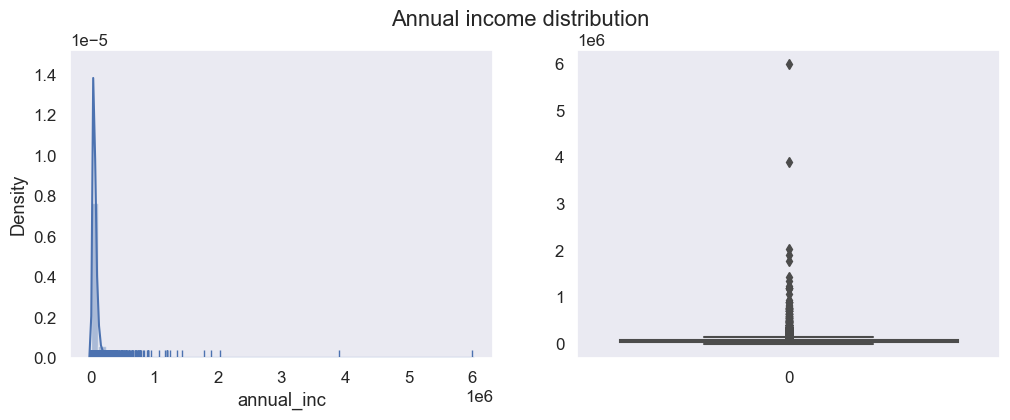

In [231]:
#Univariate Analysis - Annual Income
var1 = loan.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()
#Observation - More than 95% of people are having incomes below 235000.


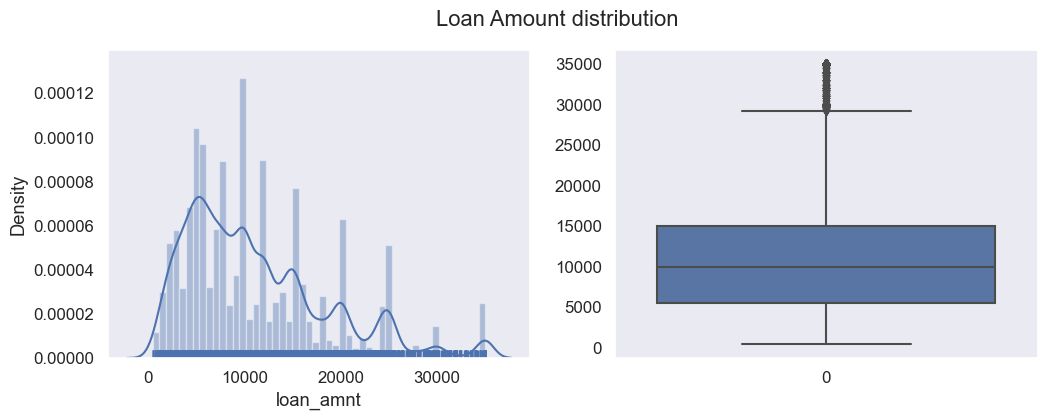

In [232]:
#Univariate Analysis - Loan amount
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=loan.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()
###Observations:
####From the below plots, more number of people took loan amount of 10000 as median of distribution is 10000.
####And very few people were in range of more than 30000 loan amount.

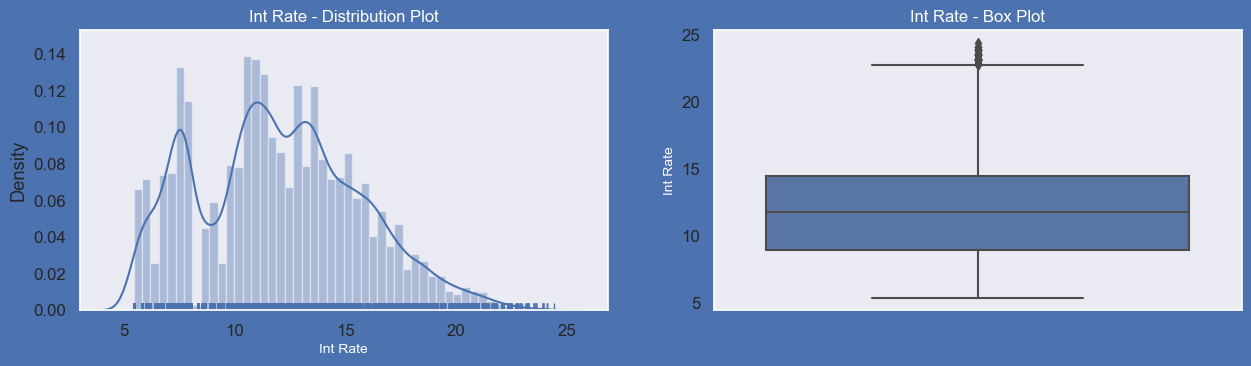

In [233]:
# Univariate Analysis on Interest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
## subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['int_rate'],rug = True)
ax.set_title('Int Rate - Distribution Plot',fontsize=12,color='w')
ax.set_xlabel('Int Rate',fontsize=10,color='w')
## subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['int_rate'])
ax.set_title('Int Rate - Box Plot',fontsize=12,color='w')
ax.set_ylabel('Int Rate',fontsize=10,color='w')
plt.show()
#Observations:
#Below plots indicate that most of interest rates lies between 9% to 14.5%. Few customers took loan at higher rates of interest = 22.5%

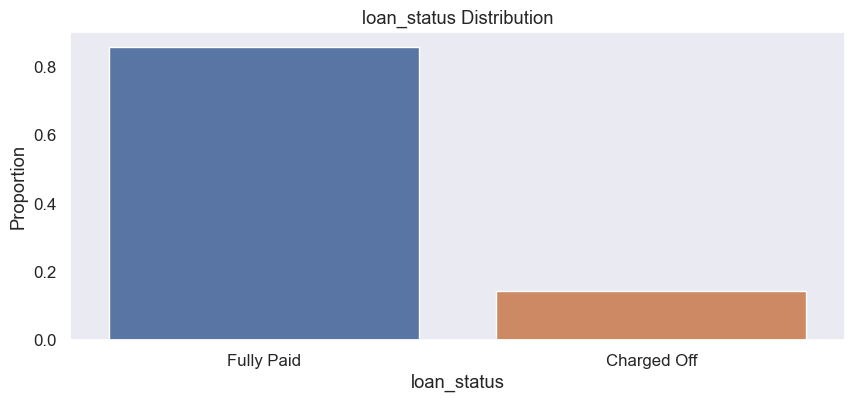

In [234]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan_data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

# Observations :
# Below plot shows that close to 85% of borrowers has paid the loan fully, where 14% were defaulted the loan.


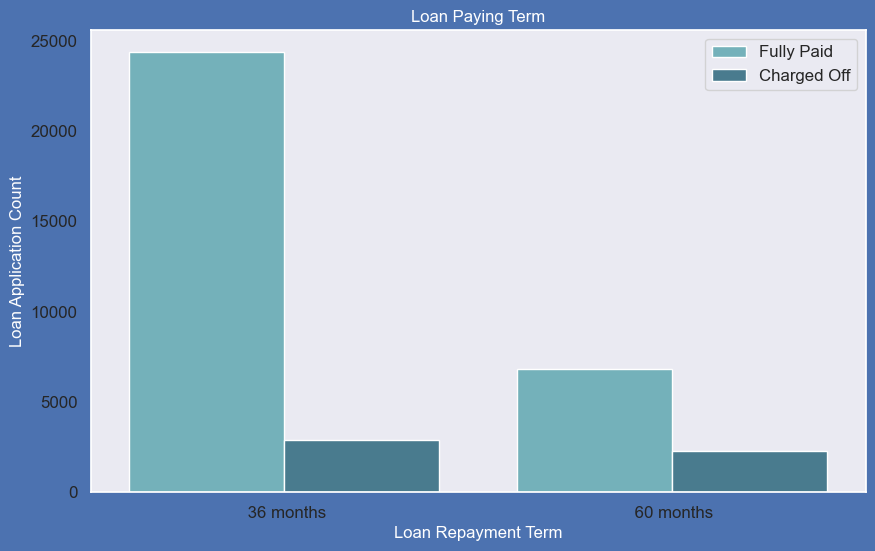

In [235]:
 # Univariate Analysis - Ordered Categorical Variables- Loan Paying Term
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=12,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=12,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=12,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()
# Observations :
# Below plot shows that those who had term of 36 months had more % of number of applicants getting 
# charged off as compared to applicants who had term of 60 months.

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

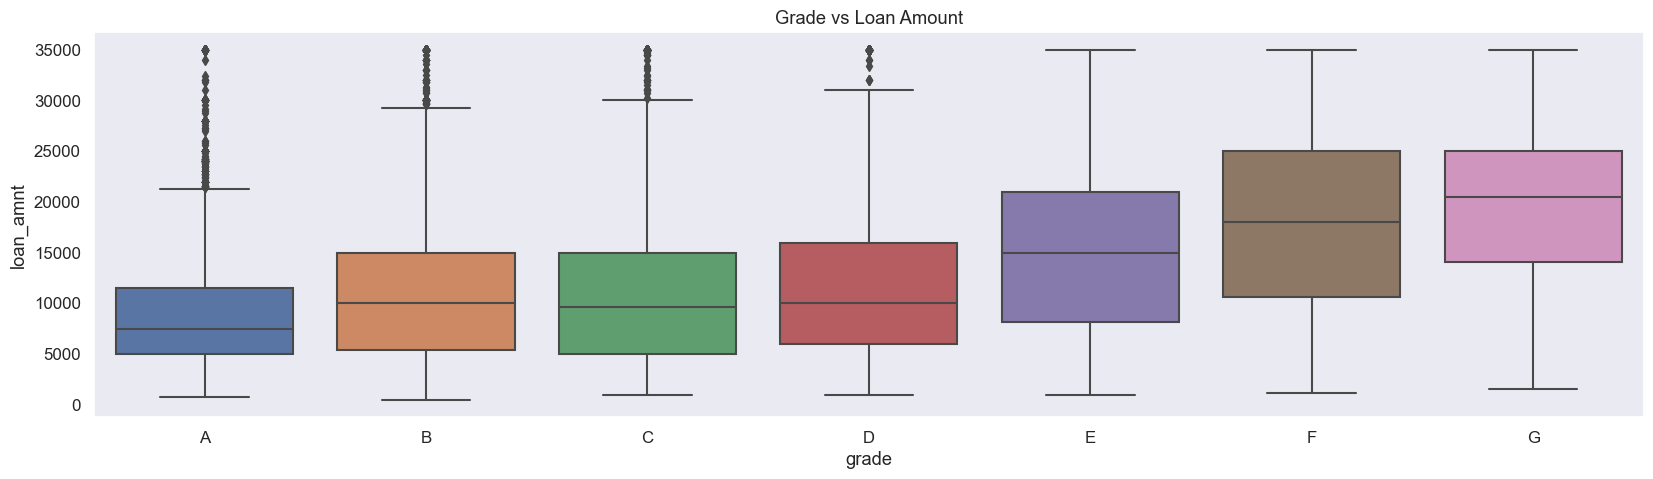

In [236]:
#Segmented Univariate Analysis - Grade vs loan amount 
plt.figure(figsize=(20,5))
plt.title('Grade vs Loan Amount')
#Find grades with sorted alphabetical order
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.loan_amnt, order = grade_ord, data=loan_data)
##Observation - Grade 'F' and 'G' have taken max loan amount. As Grades were growing the loan amount was increasing.

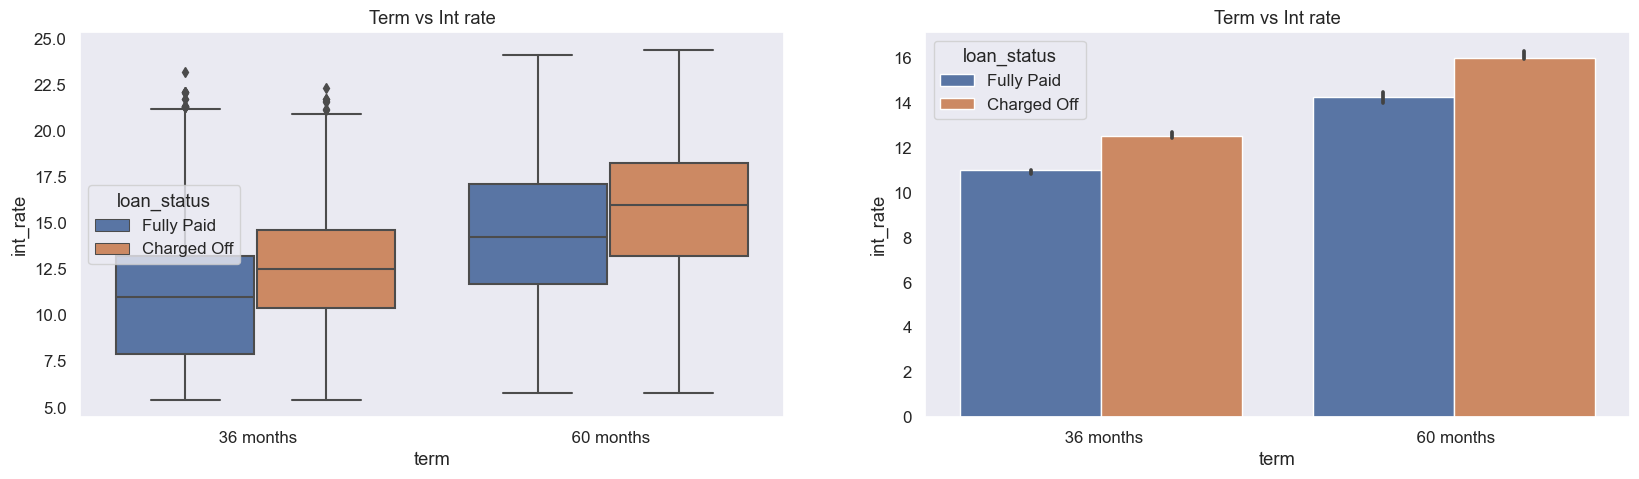

In [237]:
# Bivariate Analysis - Terms vs Interest rate
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_data)
plt.title('Term vs Int rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('Term vs Int rate')
plt.show()
#Observations -For higher interest rates the charged off was higher in both 36 and 60 months tenure.

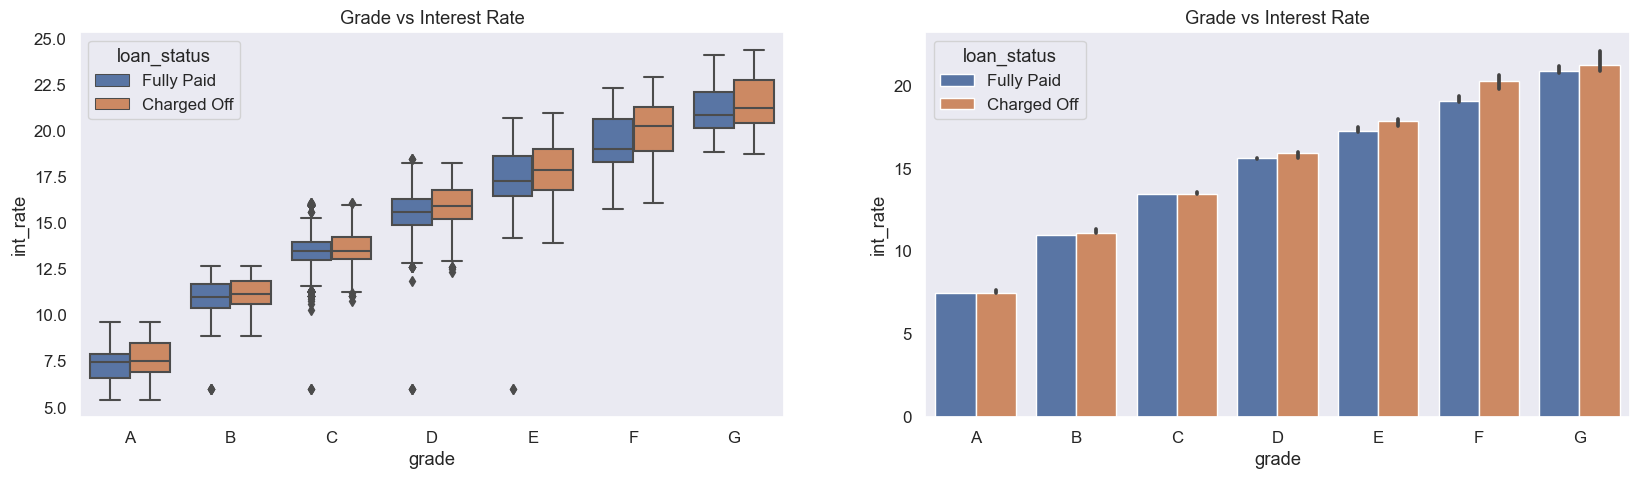

In [238]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_data, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()
#Observation - As grade decreases the interest rate increases and prone to default the loan.

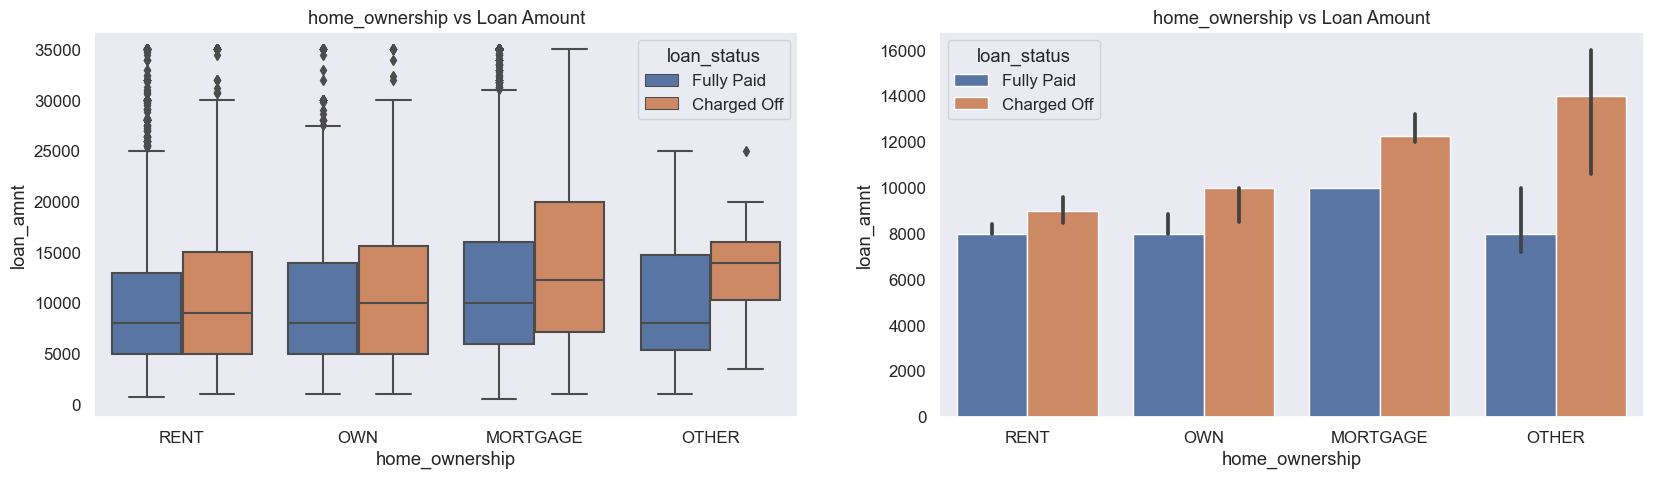

In [242]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()
#Observations - Customers who took higher loan amounts defaulted more than others.

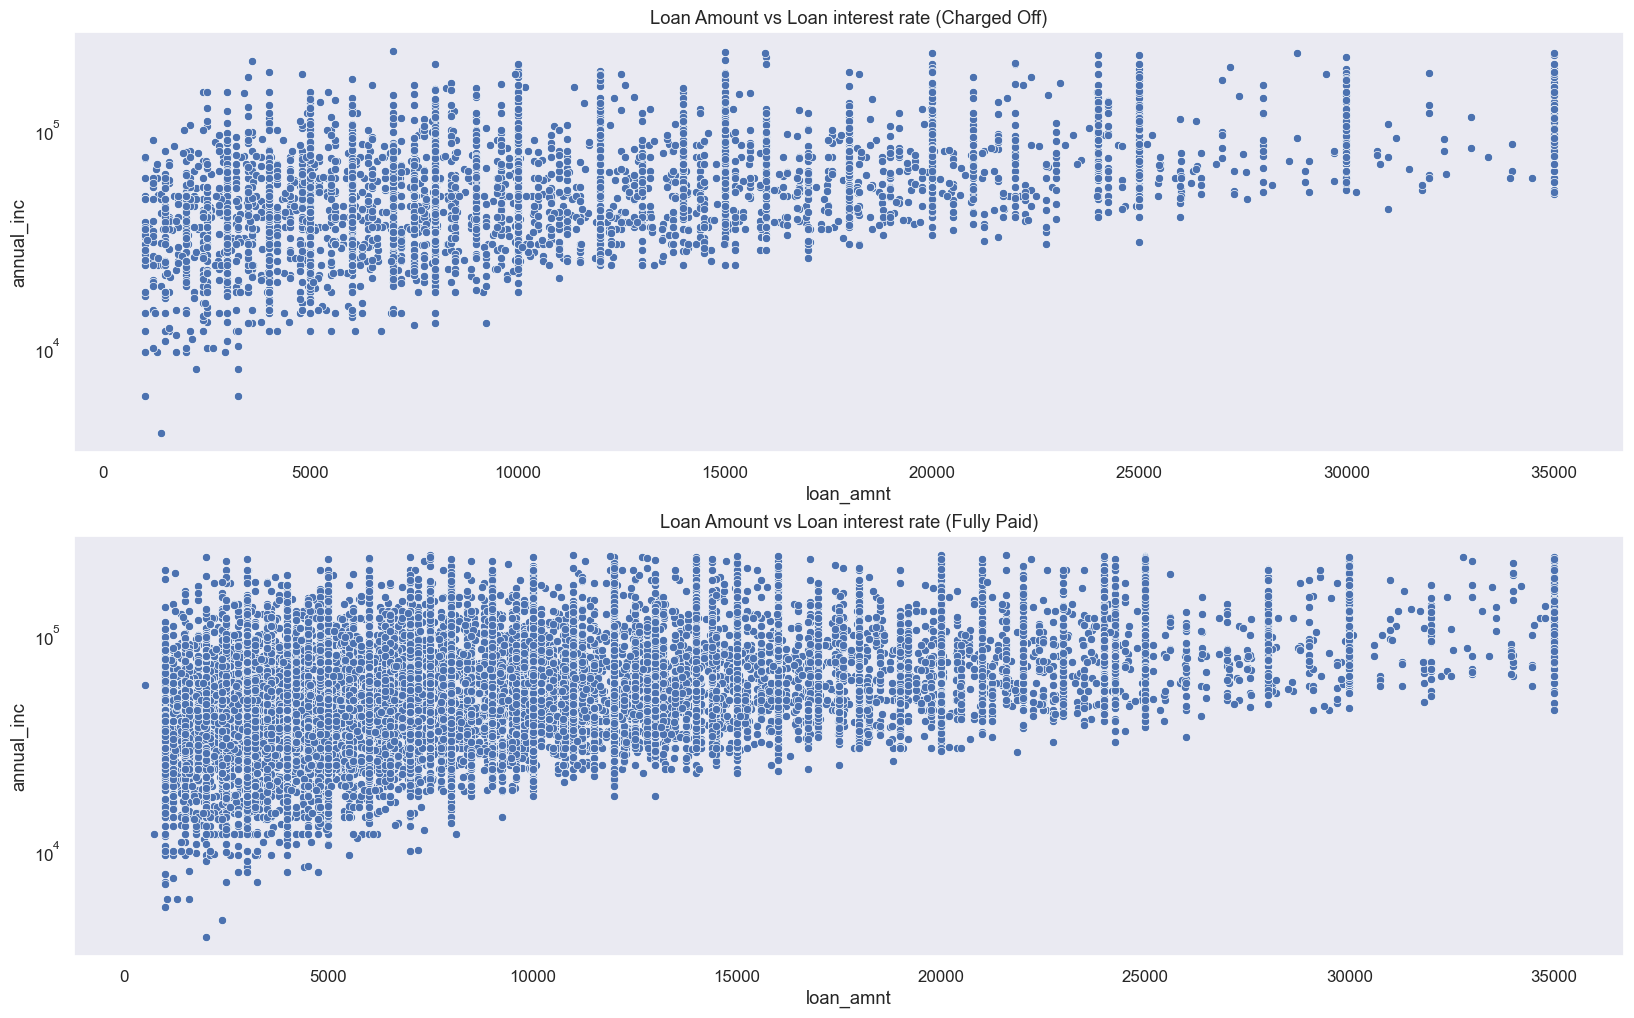

In [245]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()
#Observation - Fully paid and Charged Off loans were having similar pattern.

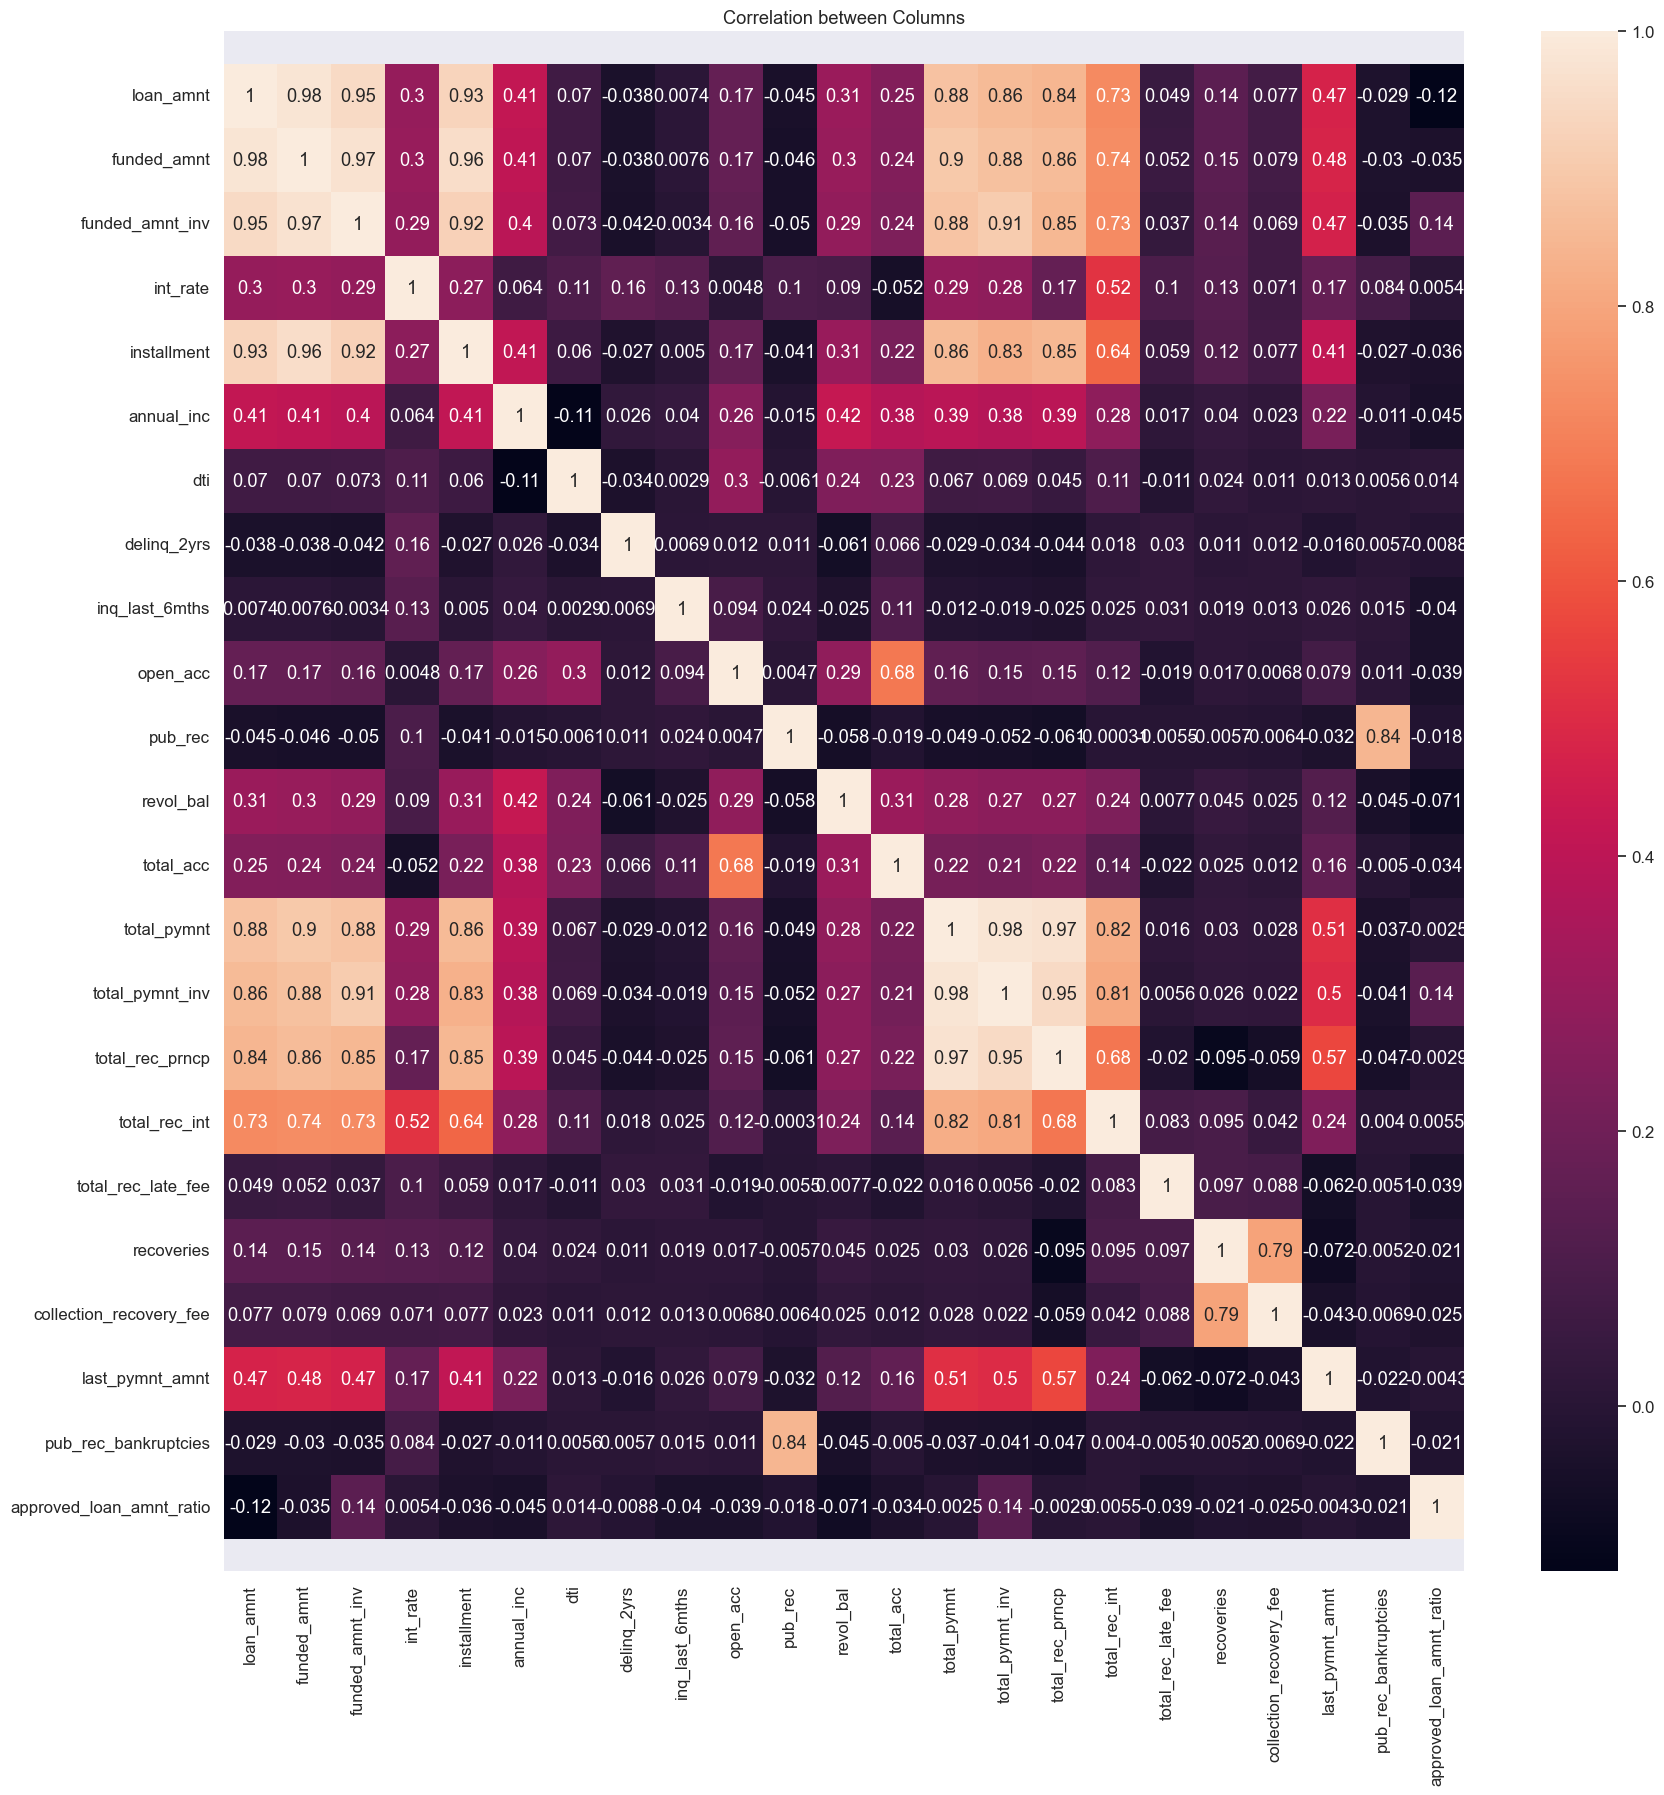

In [257]:
#Correlation Matrix HeatMap
corr_matrix = loan_data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

#Observations
# Loan amount, funded amount investor, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.